In [127]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import Image
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [128]:
data = load_boston()
X = np.array(data.data)
x = X[:,:3]
y = np.array(data.target)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [129]:
# x = []
# y = Y

# for i in range(0, len(X)):
#     x.append(X[i][1])
#     y.append(Y[i][1])


In [130]:
initial_m = 0
initial_b = 0

In [131]:
def compute_error(m, b, x, y):
    totalError = 0
    
    for i in range(0, len(x)):
        totalError += ((y[i] - (m * x[i] + b)) **2)
    
    totalError = totalError / float(len(x))
    return totalError

In [132]:
def linear_formula(x, m, b):
    return (m * x) + b

def gradient_step(x, y, current_m, current_b, learning_rate):
    gradient_m = 0
    gradient_b = 0
    N = float(len(x))
    
    for i in range(0, len(x)):
        gradient_m += (-2/N) * x[i] * (y[i] - linear_formula(x[i], current_m, current_b))
        gradient_b += (-2/N) * (y[i] - linear_formula(x[i], current_m, current_b))
    
    new_m = current_m - (learning_rate * gradient_m)
    new_b = current_b - (learning_rate * gradient_b)
    
    return [new_m, new_b]

In [133]:
def gradient_descent(x, y, current_m, current_b, learning_rate, epochs):
    m = current_m
    b = current_b
    
    check_iter = 1000
    
    for i in range(epochs):
        m, b = gradient_step(x, y, m, b, learning_rate)
        
        if i % check_iter == 0:
            print("epoch[", i, "] - loss: ", compute_error(m, b, x, y))
        
    return [m, b]

In [134]:
learning_rate = 0.0001
epochs = 10000

In [135]:
#TRAINIG

In [136]:
m, b = gradient_descent(X_train, y_train, initial_m, initial_b, learning_rate, epochs)
print("m: ", m, "b: ", b)

epoch[ 0 ] - loss:  [594.20104711 546.48375939 576.37666868]
epoch[ 1000 ] - loss:  [423.0204576  322.06642297 287.02577572]
epoch[ 2000 ] - loss:  [322.58973849 253.82129924 263.64346534]
epoch[ 3000 ] - loss:  [250.97739271 204.25295845 242.73245251]
epoch[ 4000 ] - loss:  [199.91405159 168.25008713 224.03154356]
epoch[ 5000 ] - loss:  [163.50322358 142.10019542 207.30715061]
epoch[ 6000 ] - loss:  [137.54040235 123.1067982  192.35037389]
epoch[ 7000 ] - loss:  [119.02755541 109.31136294 178.97439245]
epoch[ 8000 ] - loss:  [105.82692906  99.29135273 167.01213059]
epoch[ 9000 ] - loss:  [ 96.41419333  92.01353926 156.31417102]
m:  [-0.2431286   0.22044394  0.45432246] b:  [19.66545951 16.54406381 12.7943881 ]


In [ ]:
#TESTING

In [70]:
m, b = gradient_descent(X_test, y_test, initial_m, initial_b, learning_rate, epochs)

epoch[ 0 ] - loss:  [526.15733089 475.84737255 509.10295981]
epoch[ 100 ] - loss:  [491.81156226 340.41980966 260.9597472 ]
epoch[ 200 ] - loss:  [476.79254858 331.43228388 258.61655158]
epoch[ 300 ] - loss:  [462.30570917 322.72442788 256.46510072]
epoch[ 400 ] - loss:  [448.31820135 314.28753902 254.33564337]
epoch[ 500 ] - loss:  [434.81280298 306.11318548 252.22784007]
epoch[ 600 ] - loss:  [421.77289713 298.1931978  250.14147053]
epoch[ 700 ] - loss:  [409.1824396  290.51966073 248.07631681]
epoch[ 800 ] - loss:  [397.02593917 283.08490534 246.03216316]
epoch[ 900 ] - loss:  [385.2884386  275.88150132 244.00879604]


In [117]:
pred_y = []

for i in range(0, len(x)):
    pred_y.append(linear_formula(x[i], m[2], b[2]))

In [118]:
pred_y = np.array(pred_y)

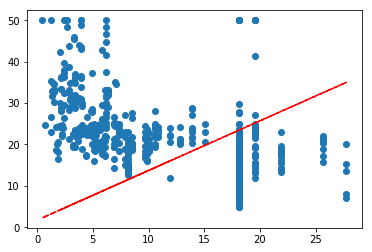

In [119]:
plt.scatter(x[:,2], y)
plt.plot(x[:,2],pred_y[:,2], 'r--')